In [30]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Load histories into dict
histories = {}
histories['model_3_0_0_16_history'] = pickle.load(open("../results/final/model_3_0_0_16_history.p", "rb"))
histories['model_3_0.1_0.15_16_history'] = pickle.load(open("../results/final/model_3_0.1_0.15_16_history.p", "rb"))
histories['model_3_0.1_0.3_16_history'] = pickle.load(open("../results/final/model_3_0.1_0.3_16_history.p", "rb"))
histories['model_4_0_0_16_history'] = pickle.load(open("../results/final/model_4_0_0_16_history.p", "rb"))
histories['model_4_0.1_0.15_16_history'] = pickle.load(open("../results/final/model_4_0.1_0.15_16_history.p", "rb"))
histories['model_4_0.1_0.3_16_history'] = pickle.load(open("../results/final/model_4_0.1_0.3_16_history.p", "rb"))
histories['model_6_0_0_8_history'] = pickle.load(open("../results/final/model_6_0_0_8_history.p", "rb"))
histories['model_6_0.1_0.15_8_history'] = pickle.load(open("../results/final/model_6_0.1_0.15_8_history.p", "rb"))
histories['model_6_0.1_0.3_8_history'] = pickle.load(open("../results/final/model_6_0.1_0.3_8_history.p", "rb"))

In [32]:
# Removing '_1' from history keys
for key in histories:
    for key2 in list(histories[key]):
        if "_1" in key2:
            new_key = key2.replace('_1','')
            histories[key][new_key] = histories[key].pop(key2)

In [33]:
# Calculate the (val) f1 scores
def calc_f1_scores(history):
    f1_scores = []
    val_f1_scores = []

    for i in range(len(history['precision'])):
        f1_score = 2 * ((history['precision'][i] * history['recall'][i]) / 
                        (history['precision'][i] + history['recall'][i]))
        f1_scores.append(f1_score)

    for i in range(len(history['val_precision'])):
        val_f1_score = 2 * ((history['val_precision'][i] * history['val_recall'][i]) / 
                        (history['val_precision'][i] + history['val_recall'][i]))
        val_f1_scores.append(val_f1_score)
        
    return f1_scores, val_f1_scores

# Plotting

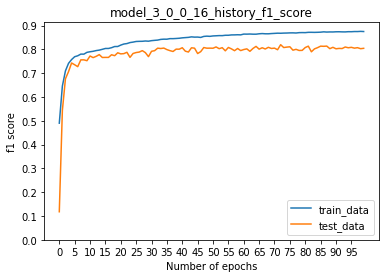

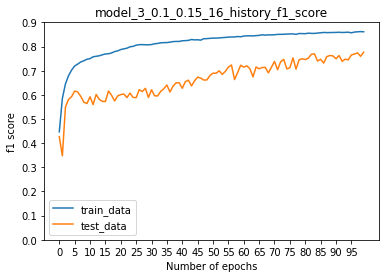

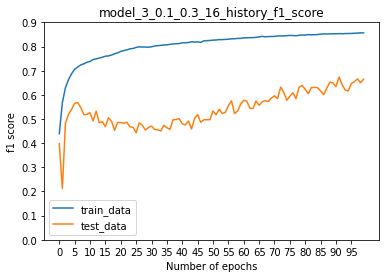

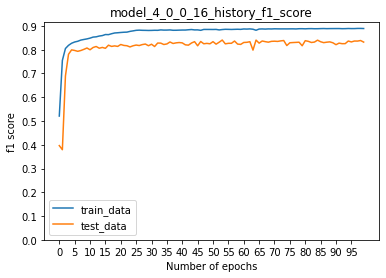

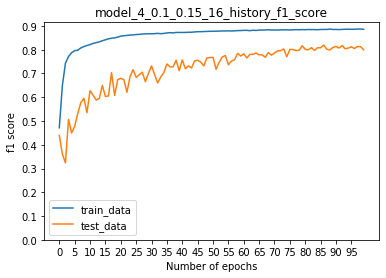

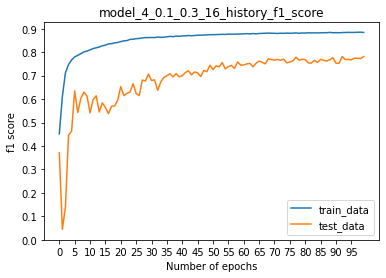

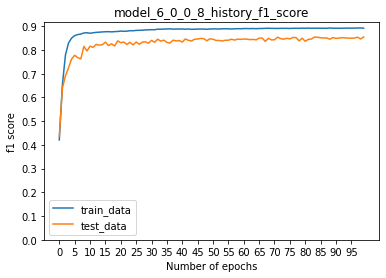

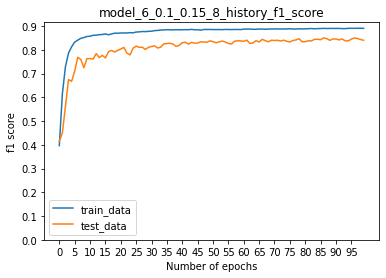

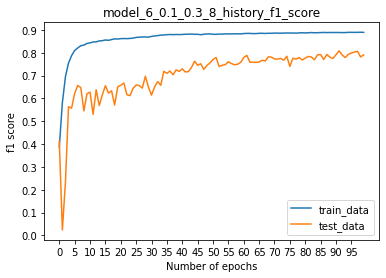

In [34]:
# Plot f1 for all models
for key in histories:
    f1_scores, val_f1_scores = calc_f1_scores(histories[key])
    
    plt.plot(f1_scores, label='train_data')
    plt.plot(val_f1_scores, label='test_data')

    plt.xlabel("Number of epochs")
    plt.ylabel("f1 score")
    plt.title(key + '_f1_score')

    plt.xticks(np.arange(0, len(f1_scores), step=5))
    plt.yticks(np.arange(0, 1, step=0.1))

    plt.legend()
    plt.savefig('images/' + key + '_f1_score.png')
    plt.show()

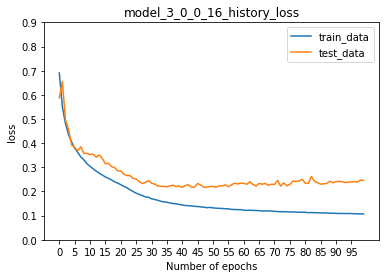

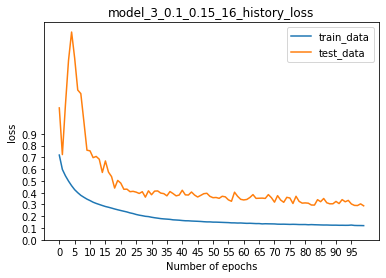

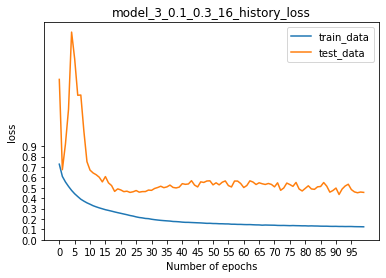

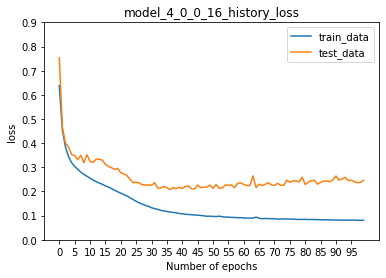

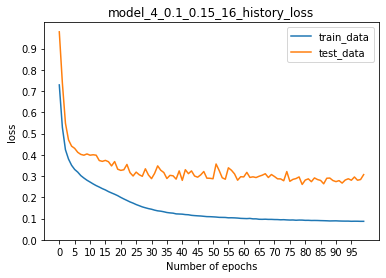

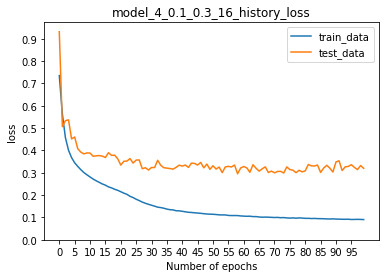

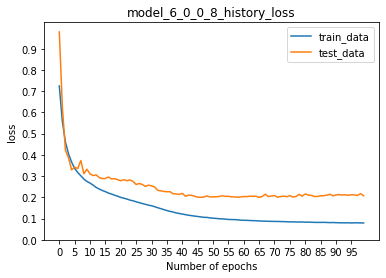

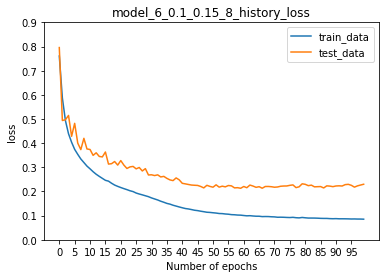

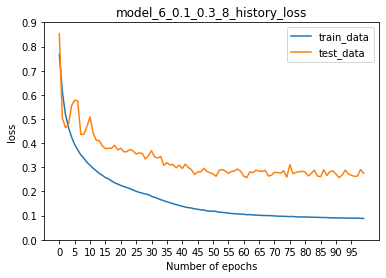

In [35]:
# Plot losses for all models
for key in histories:
    plt.plot(histories[key]['loss'], label='train_data')
    plt.plot(histories[key]['val_loss'], label='test_data')

    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.title(key + '_loss')

    plt.xticks(np.arange(0, len(histories[key]['loss']), step=5))
    plt.yticks(np.arange(0, 1, step=0.1))

    plt.legend()
    plt.savefig('images/' + key + '_loss.png')
    plt.show()

# Which is the best model?

In [36]:
for key in histories:
    f1_scores, val_f1_scores = calc_f1_scores(histories[key])
    
    print(key)
    print(str(np.array(val_f1_scores).max()))
    print("in epoch " + str(np.array(val_f1_scores).argmax()))
    print()

model_3_0_0_16_history
0.8199462452582048
in epoch 72

model_3_0.1_0.15_16_history
0.7766805202309225
in epoch 99

model_3_0.1_0.3_16_history
0.6737731264753939
in epoch 91

model_4_0_0_16_history
0.8406774102143404
in epoch 53

model_4_0.1_0.15_16_history
0.8196035783226715
in epoch 86

model_4_0.1_0.3_16_history
0.7813672587978706
in epoch 99

model_6_0_0_8_history
0.8552109168948401
in epoch 99

model_6_0.1_0.15_8_history
0.8503913364840343
in epoch 86

model_6_0.1_0.3_8_history
0.8084764329334192
in epoch 91



# What is the effect of Dropout?

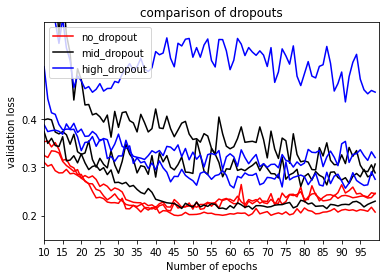

In [43]:
dropout_0 = [histories['model_3_0_0_16_history'], histories['model_4_0_0_16_history'], 
             histories['model_6_0_0_8_history']]
dropout_1 = [histories['model_3_0.1_0.15_16_history'], histories['model_4_0.1_0.15_16_history'], 
             histories['model_6_0.1_0.15_8_history']]
dropout_2 = [histories['model_3_0.1_0.3_16_history'], histories['model_4_0.1_0.3_16_history'], 
             histories['model_6_0.1_0.3_8_history']]


plt.plot(dropout_0[0]['val_loss'], label='no_dropout', color='r')
plt.plot(dropout_0[1]['val_loss'], color='r')
plt.plot(dropout_0[2]['val_loss'], color='r')

plt.plot(dropout_1[0]['val_loss'], label='mid_dropout', color='k')
plt.plot(dropout_1[1]['val_loss'], color='k')
plt.plot(dropout_1[2]['val_loss'], color='k')

plt.plot(dropout_2[0]['val_loss'], label='high_dropout', color='b')
plt.plot(dropout_2[1]['val_loss'], color='b')
plt.plot(dropout_2[2]['val_loss'], color='b')

plt.xlabel("Number of epochs")
plt.ylabel("validation loss")
plt.title('comparison of dropouts')

plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 0.5, step=0.1))

axes = plt.gca()
axes.set_ylim([0.15,0.6])
axes.set_xlim([10,100])

plt.legend()
#plt.savefig('images/dropout_loss.png')
plt.show()

In [38]:
dropout_0_avg = []
for i in range(100):
    sum = dropout_0[0]['val_loss'][i] + dropout_0[1]['val_loss'][i] + dropout_0[2]['val_loss'][i]
    dropout_0_avg.append(sum/3)

In [39]:
dropout_1_avg = []
for i in range(100):
    sum = dropout_1[0]['val_loss'][i] + dropout_1[1]['val_loss'][i] + dropout_1[2]['val_loss'][i]
    dropout_1_avg.append(sum/3)

In [40]:
dropout_2_avg = []
for i in range(100):
    sum = dropout_2[0]['val_loss'][i] + dropout_2[1]['val_loss'][i] + dropout_2[2]['val_loss'][i]
    dropout_2_avg.append(sum/3)

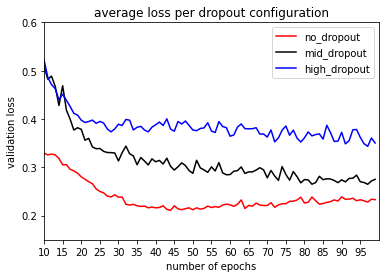

In [41]:
plt.plot(dropout_0_avg, label='no_dropout', color='r')

plt.plot(dropout_1_avg, label='mid_dropout', color='k')

plt.plot(dropout_2_avg, label='high_dropout', color='b')

plt.xlabel("number of epochs")
plt.ylabel("validation loss")
plt.title('average loss per dropout configuration')

plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 0.7, step=0.1))

axes = plt.gca()
axes.set_ylim([0.15,0.6])
axes.set_xlim([10,100])

plt.legend()
plt.savefig('images/avg_dropout_loss.png')
plt.show()

# What is the effect of No. of layers (model complexity)?

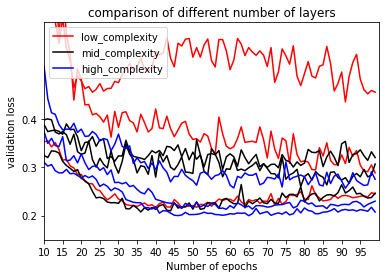

In [42]:
layers_0 = [histories['model_3_0_0_16_history'], histories['model_3_0.1_0.15_16_history'], histories['model_3_0.1_0.3_16_history']]
layers_1 = [histories['model_4_0_0_16_history'], histories['model_4_0.1_0.15_16_history'], histories['model_4_0.1_0.3_16_history']]
layers_2 = [histories['model_6_0_0_8_history'], histories['model_6_0.1_0.15_8_history'], histories['model_6_0.1_0.3_8_history']]


plt.plot(layers_0[0]['val_loss'], label='low_complexity', color='r')
plt.plot(layers_0[1]['val_loss'], color='r')
plt.plot(layers_0[2]['val_loss'], color='r')

plt.plot(layers_1[0]['val_loss'], label='mid_complexity', color='k')
plt.plot(layers_1[1]['val_loss'], color='k')
plt.plot(layers_1[2]['val_loss'], color='k')

plt.plot(layers_2[0]['val_loss'], label='high_complexity', color='b')
plt.plot(layers_2[1]['val_loss'], color='b')
plt.plot(layers_2[2]['val_loss'], color='b')

plt.xlabel("Number of epochs")
plt.ylabel("validation loss")
plt.title('comparison of different number of layers')

plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 0.5, step=0.1))

axes = plt.gca()
axes.set_ylim([0.15,0.6])
axes.set_xlim([10,100])

plt.legend()
plt.savefig('images/complexity_loss.png')
plt.show()

In [44]:
layers_0_avg = []
for i in range(100):
    sum = layers_0[0]['val_loss'][i] + layers_0[1]['val_loss'][i] + layers_0[2]['val_loss'][i]
    layers_0_avg.append(sum/3)

In [45]:
print(np.array(layers_0_avg).min())
print("epoch " + str(np.array(layers_0_avg).argmin()))

0.3272929936647415
epoch 97


In [46]:
layers_1_avg = []
for i in range(100):
    sum = layers_1[0]['val_loss'][i] + layers_1[1]['val_loss'][i] + layers_1[2]['val_loss'][i]
    layers_1_avg.append(sum/3)

In [47]:
print(np.array(layers_1_avg).min())
print("epoch " + str(np.array(layers_1_avg).argmin()))

0.267477681239446
epoch 73


In [48]:
layers_2_avg = []
for i in range(100):
    sum = layers_2[0]['val_loss'][i] + layers_2[1]['val_loss'][i] + layers_2[2]['val_loss'][i]
    layers_2_avg.append(sum/3)

In [49]:
print(np.array(layers_2_avg).min())
print("epoch " + str(np.array(layers_2_avg).argmin()))

0.22537286579608917
epoch 61


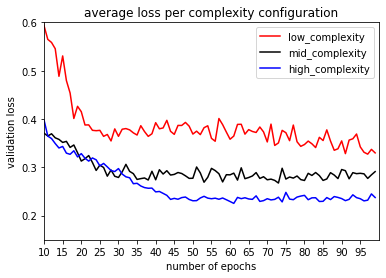

In [50]:
plt.plot(layers_0_avg, label='low_complexity', color='r')

plt.plot(layers_1_avg, label='mid_complexity', color='k')

plt.plot(layers_2_avg, label='high_complexity', color='b')

plt.xlabel("number of epochs")
plt.ylabel("validation loss")
plt.title('average loss per complexity configuration')

plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 0.7, step=0.1))

axes = plt.gca()
axes.set_ylim([0.15,0.6])
axes.set_xlim([10,100])

plt.legend()
plt.savefig('images/avg_complexity_loss.png')
plt.show()

# Best model history

In [51]:
best_history = pickle.load(open("../results/final/best-model/model_6_0_0_8_history_e150.p", "rb"))

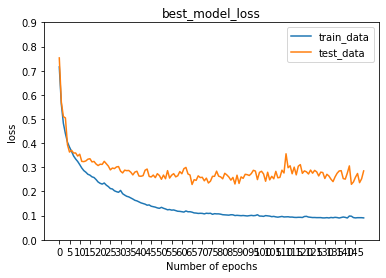

In [52]:
plt.plot(best_history['loss'], label='train_data')
plt.plot(best_history['val_loss'], label='test_data')

plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.title('best_model_loss')

plt.xticks(np.arange(0, len(best_history['loss']), step=5))
plt.yticks(np.arange(0, 1, step=0.1))

plt.legend()
#plt.savefig('images/best_model_loss.png')
plt.show()

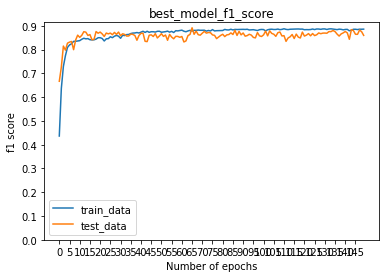

In [53]:
f1_scores, val_f1_scores = calc_f1_scores(best_history)
    
plt.plot(f1_scores, label='train_data')
plt.plot(val_f1_scores, label='test_data')

plt.xlabel("Number of epochs")
plt.ylabel("f1 score")
plt.title('best_model_f1_score')

plt.xticks(np.arange(0, len(f1_scores), step=5))
plt.yticks(np.arange(0, 1, step=0.1))

plt.legend()
#plt.savefig('images/best_model_f1_score.png')
plt.show()

In [54]:
print(str(np.array(f1_scores).max()))
print("in epoch " + str(np.array(f1_scores).argmax()))

0.8873658484110901
in epoch 110


In [55]:
f1_scores[len(f1_scores) - 1]

0.8858057839486059

In [56]:
f1_scores[111]

0.8848412296462713